<a href="https://colab.research.google.com/github/priyansh4320/tensorflow-practice/blob/main/tf_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression with TF


In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
#download fuelconsumption.csv dataset
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-06-21 11:57:04--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.003s  

2023-06-21 11:57:04 (20.9 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
#read data
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [24]:
# define x and y for simple LR (x=enginesize, y=co2emission)
X = np.asarray(df['ENGINESIZE'])
Y = np.asarray(df['CO2EMISSIONS'])


In [27]:
Y

array([196, 221, 136, ..., 271, 260, 294])

In [59]:
# define a&b / coef&intercept for LR
coef = tf.Variable(20.0)
intercept = tf.Variable(30.4)

#create lr function
def lr(trainx):
  y = coef * trainx + intercept
  return y

In [60]:
#define loss function
def loss_object(y,trainy):
    return tf.reduce_mean(tf.square(y-trainy))

    loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

In [61]:
#create tensorflow simple linear regression model
learn_rate = 0.01
train_data = []
loss_value = []
a_value = []
b_value = []

max_epoch = 200

for epoch in range(max_epoch):
  with tf.GradientTape() as tape:
    y_predicted = lr(X)
    loss_val = loss_object(y_predicted,Y)
    loss_value.append(loss_val)

    gradients = tape.gradient(loss_val,[intercept,coef])

    a_value.append(coef.numpy())
    b_value.append(intercept.numpy())
    intercept.assign_sub(gradients[0]*learn_rate)
    coef.assign_sub(gradients[1]*learn_rate)

    if epoch % 5 ==0 :
      train_data.append([coef.numpy(),intercept.numpy()])

In [62]:
loss_value[:5]

[<tf.Tensor: shape=(), dtype=float32, numpy=26928.99>,
 <tf.Tensor: shape=(), dtype=float32, numpy=14889.487>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8665.402>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5446.3203>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3780.021>]

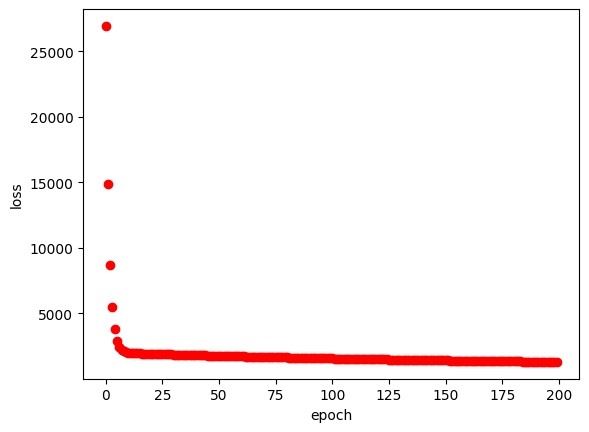

In [63]:
import matplotlib.pyplot as plt

plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(loss_value,"ro")